# Approach to the diamonds data set


### The intention is to find everything I can form the data. How they are structures, any problem with 
### the values or any obvious relation with the price. For that I will use every plot and describer I 
### consider relevant.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train =  pd.read_csv('INPUT/train.csv')
predict= pd.read_csv('INPUT/predict.csv')

In [4]:
train.head()


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


In [5]:
predict.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16


In [5]:
train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [6]:
print(train.shape, predict.shape)

(40455, 11) (13485, 10)


In [7]:
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
#correlation matrix
correlation_matrix = train.drop(columns=['id', 'price'], axis=1).corr()

In [9]:
#A mask
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


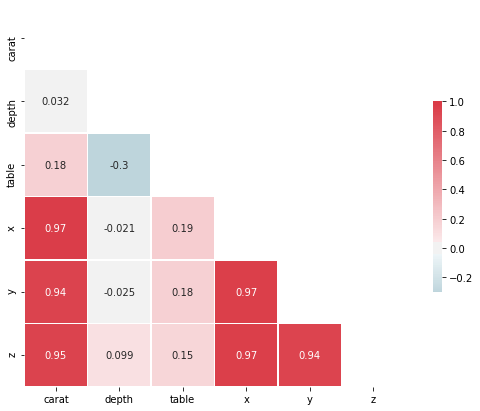

In [10]:
#Heatmap:
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

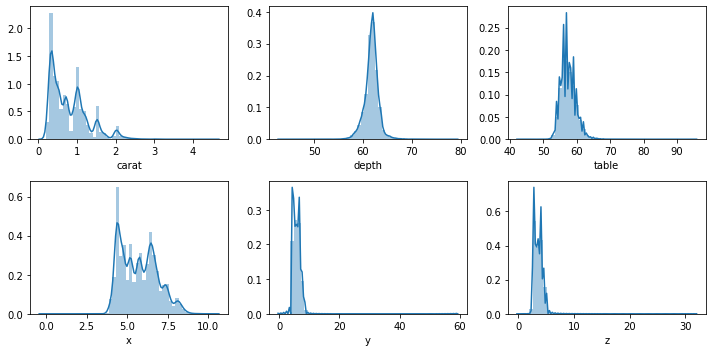

In [11]:
f, ax = plt.subplots(2,3, figsize=(10,5))
for i, e in enumerate(train.drop(columns=['id','cut', 'color', 'clarity', 'price'], axis=1)):
    sns.distplot(train[e], ax = ax[(0 if i<3 else 1),(i if i<3 else i-3)])
plt.tight_layout()



findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


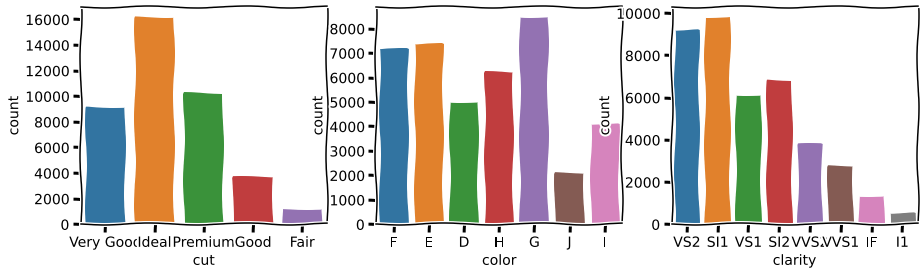

In [14]:
with plt.xkcd():
    f, ax = plt.subplots(1,3, figsize = (15,4))
    sns.countplot(train['cut'], ax = ax[0])
    sns.countplot(train['color'], ax = ax[1])
    sns.countplot(train['clarity'], ax = ax[2])

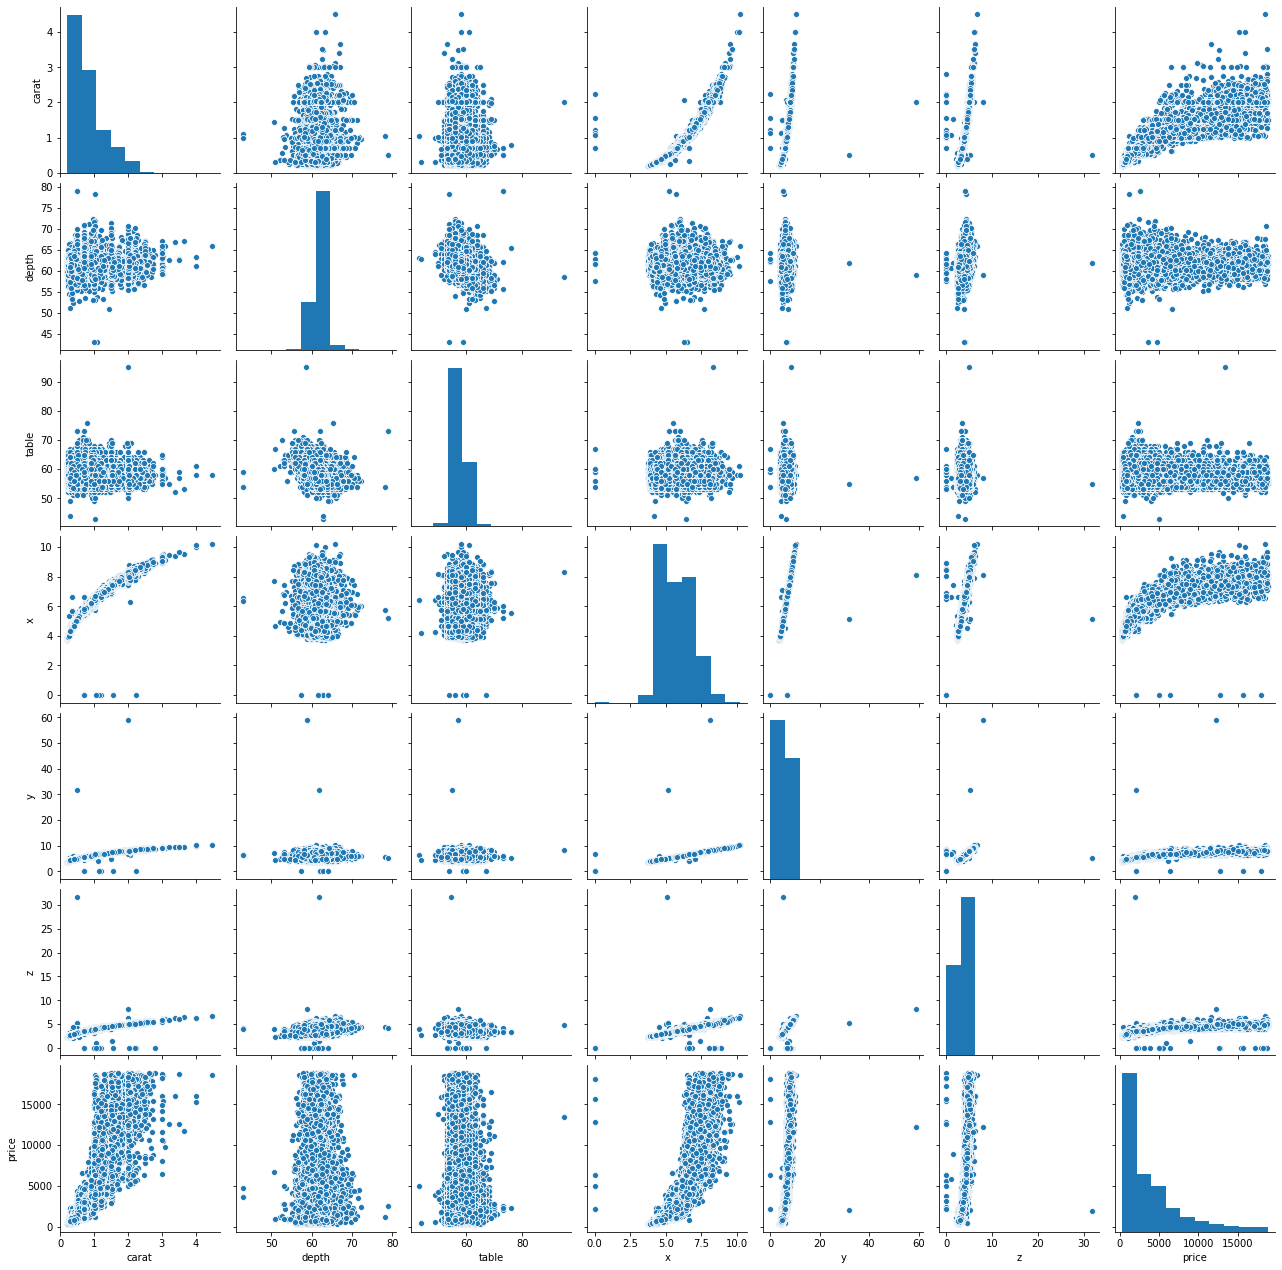

In [16]:
sns.pairplot(train.drop(columns=['id','cut', 'color', 'clarity']))

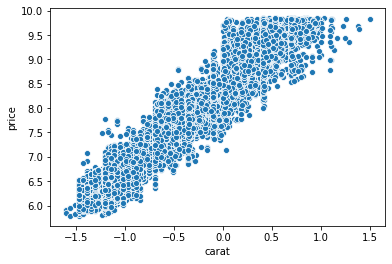

In [17]:

log_x = train['carat'].apply(lambda x: np.log(x))
log_y = train['price'].apply(lambda x: np.log(x))
sns.scatterplot(log_x, log_y,  data=train)